In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import klib
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
d = pd.read_csv("crop_yield.csv")
d

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P),Potassium (K),Yeild (Q/acre)
0,1230.0,80.0,28.0,80.0,24.0,20.0,12.0
1,480.0,60.0,36.0,70.0,20.0,18.0,8.0
2,1250.0,75.0,29.0,78.0,22.0,19.0,11.0
3,450.0,65.0,35.0,70.0,19.0,18.0,9.0
4,1200.0,80.0,27.0,79.0,22.0,19.0,11.0
...,...,...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0,20.0,9.0
95,425.0,60.0,39.0,65.0,19.0,17.0,6.5
96,1220.0,79.0,28.0,77.0,23.0,21.0,10.5
97,480.0,65.0,36.0,68.0,21.0,16.0,7.0


**FEATURE ENGINEERING**

In [3]:
x = d.iloc[:,:5]
x

,Rain Fall (mm),Fertilizer(urea) (kg/acre),Temperature (°C),Nitrogen (N),Phosphorus (P)
0,1230.0,80.0,28.0,80.0,24.0
1,480.0,60.0,36.0,70.0,20.0
2,1250.0,75.0,29.0,78.0,22.0
3,450.0,65.0,35.0,70.0,19.0
4,1200.0,80.0,27.0,79.0,22.0
...,...,...,...,...,...
94,1250.0,77.0,28.0,78.0,23.0
95,425.0,60.0,39.0,65.0,19.0
96,1220.0,79.0,28.0,77.0,23.0
97,480.0,65.0,36.0,68.0,21.0


In [4]:
y = d.iloc[:,6]
y

0     12.0
1      8.0
2     11.0
3      9.0
4     11.0
      ... 
94     9.0
95     6.5
96    10.5
97     7.0
98    12.0
Name: Yeild (Q/acre), Length: 99, dtype: float64

In [5]:
x = x.to_numpy()

In [6]:
y = y.to_numpy()

**FEATURE SCALING**

In [7]:
sc = StandardScaler()

In [8]:
x = sc.fit_transform(x)
x

array([[ 0.95524034,  1.22195037, -0.81386216,  1.39428701,  1.47732437],
       [-0.92910066, -0.78257468,  0.66792826, -0.11099559, -0.58260679],
       [ 1.00548944,  0.72081911, -0.62863836,  1.09323049,  0.44735879],
       [-1.0044743 , -0.28144342,  0.48270446, -0.11099559, -1.09758958],
       [ 0.8798667 ,  1.22195037, -0.99908597,  1.24375875,  0.44735879],
       [-0.87885157,  0.21968785,  0.29748065,  0.49111745,  0.44735879],
       [ 1.0683008 ,  0.3199141 , -0.81386216,  0.94270223, -0.067624  ],
       [-1.06728567, -0.28144342,  0.85315206, -0.56258036, -1.61257237],
       [ 0.8798667 ,  0.92127162, -0.99908597,  1.09323049,  0.96234158],
       [-1.13009704, -1.78483721,  1.22359967, -1.61627818, -1.61257237],
       [ 1.08086308,  1.22195037, -1.18430977,  1.39428701,  1.47732437],
       [-1.09241022, -1.28370594,  1.03837586, -0.86363688, -1.09758958],
       [ 0.94267807,  1.12172412, -0.62863836,  1.24375875,  0.96234158],
       [-1.06728567, -1.78483721,  0.8

In [9]:
y = sc.fit_transform(y.reshape(-1,1))
y

array([[ 1.50796194],
       [-0.53708234],
       [ 0.99670087],
       [-0.02582127],
       [ 0.99670087],
       [ 0.4854398 ],
       [ 0.99670087],
       [-1.04834341],
       [ 1.50796194],
       [-1.55960448],
       [ 1.50796194],
       [-0.53708234],
       [ 0.99670087],
       [-0.02582127],
       [ 0.99670087],
       [-1.81523501],
       [ 1.50796194],
       [-1.04834341],
       [ 0.99670087],
       [ 1.50796194],
       [-1.55960448],
       [ 0.99670087],
       [-1.04834341],
       [ 0.4854398 ],
       [-0.02582127],
       [ 0.4854398 ],
       [-1.55960448],
       [ 1.50796194],
       [-1.04834341],
       [ 0.4854398 ],
       [ 0.99670087],
       [-1.55960448],
       [ 0.99670087],
       [-1.04834341],
       [ 0.4854398 ],
       [-0.02582127],
       [ 0.4854398 ],
       [-1.55960448],
       [ 1.50796194],
       [-0.53708234],
       [ 0.99670087],
       [-1.04834341],
       [ 0.99670087],
       [-1.55960448],
       [ 0.99670087],
       [-1

**SPLITTING THE MODEL**

In [10]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)

In [11]:
x_train

array([[-1.0044743 , -1.78483721,  0.85315206, -1.61627818, -1.61257237],
       [ 0.99292716,  0.92127162, -0.99908597,  0.64164571,  0.44735879],
       [ 0.94267807,  0.72081911, -0.62863836,  0.94270223,  0.96234158],
       [-1.13009704, -0.78257468,  1.22359967, -1.61627818, -1.61257237],
       [-1.02959885, -0.98302719,  0.85315206, -0.71310862,  0.44735879],
       [-1.0044743 , -1.28370594,  1.03837586, -0.86363688, -1.09758958],
       [-1.13009704, -1.78483721,  1.22359967, -1.61627818, -1.61257237],
       [-1.0044743 , -0.28144342,  1.03837586, -1.61627818, -0.58260679],
       [-1.09241022, -1.28370594,  1.03837586, -0.86363688, -1.09758958],
       [-1.10497249, -1.28370594,  1.03837586, -0.4120521 , -0.58260679],
       [ 1.00548944,  0.92127162, -0.81386216,  1.09323049,  0.96234158],
       [ 0.75424397,  1.22195037, -1.18430977,  0.64164571, -0.067624  ],
       [-1.11753476, -1.28370594,  0.66792826, -1.61627818, -0.067624  ],
       [-1.10497249, -1.5843847 ,  1.4

In [12]:
x_test

array([[ 0.8798667 ,  0.72081911, -0.99908597,  1.24375875, -0.067624  ],
       [ 1.0683008 ,  1.02149787, -0.81386216,  0.94270223,  0.96234158],
       [-1.06728567, -0.78257468,  1.22359967, -0.86363688, -1.09758958],
       [ 0.75424397,  0.92127162, -0.81386216,  0.79217397,  0.96234158],
       [-0.92910066, -0.28144342,  0.66792826, -0.4120521 , -0.067624  ],
       [ 1.13111217,  0.82104536, -0.81386216,  0.94270223,  0.44735879],
       [ 0.8798667 ,  0.72081911, -0.99908597,  0.79217397, -0.067624  ],
       [ 0.81705534,  1.02149787, -0.81386216,  0.64164571,  0.96234158],
       [ 1.08086308,  1.22195037, -1.18430977,  1.39428701,  1.47732437],
       [ 0.95524034,  1.22195037, -0.81386216,  1.39428701,  1.47732437],
       [-0.94166294, -1.28370594,  1.22359967, -1.46574992, -1.61257237],
       [ 1.13111217,  1.22195037, -0.81386216,  1.39428701,  1.47732437],
       [-1.01703658, -0.78257468,  1.03837586, -0.4120521 ,  0.44735879],
       [-1.13009704, -0.78257468,  1.2

**CHOOSING THE MODEL**

In [13]:
regressor = SVR()

**HYPER PARAMETER TUNING**

In [14]:
kernel = ["linear","poly","rbf","sigmoid"]

In [15]:
gamma = ["scale","auto"]

In [16]:
coef0 = [float(i) for i in np.linspace(0,50,20)]

In [17]:
verbose = [True,False]

In [18]:
random_grid = {"kernel":kernel,
              "gamma":gamma,
              "coef0":coef0,
              "verbose":verbose}
random_grid

{'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
 'gamma': ['scale', 'auto'],
 'coef0': [0.0,
  2.6315789473684212,
  5.2631578947368425,
  7.894736842105264,
  10.526315789473685,
  13.157894736842106,
  15.789473684210527,
  18.42105263157895,
  21.05263157894737,
  23.68421052631579,
  26.315789473684212,
  28.947368421052634,
  31.578947368421055,
  34.21052631578948,
  36.8421052631579,
  39.473684210526315,
  42.10526315789474,
  44.736842105263165,
  47.36842105263158,
  50.0],
 'verbose': [True, False]}

**MAKING THE MODEL**

In [19]:
model = RandomizedSearchCV(estimator = regressor,
                      param_distributions = random_grid,
                      scoring = "neg_mean_squared_error",
                      cv = 5,
                      verbose = 2,
                      random_state = 44,
                      n_jobs = 1)

**TRAINING THE MODEL**

In [20]:
model.fit(x_train,y_train.flatten())

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=rbf, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=rbf, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=rbf, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=rbf, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=rbf, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=sigmoid, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=sigmoid, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=sigmoid, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=5.2631578947368425, gamma=auto, kernel=sigmoid, verbose=True; total time=   0.0s
[LibSVM][CV] END coef0=

RandomizedSearchCV(cv=5, estimator=SVR(), n_jobs=1,
                   param_distributions={'coef0': [0.0, 2.6315789473684212,
                                                  5.2631578947368425,
                                                  7.894736842105264,
                                                  10.526315789473685,
                                                  13.157894736842106,
                                                  15.789473684210527,
                                                  18.42105263157895,
                                                  21.05263157894737,
                                                  23.68421052631579,
                                                  26.315789473684212,
                                                  28.947368421052634,
                                                  31.578947368421055,
                                                  34.21052631578948,
                                                  36.8421052631579,
                                                  39.473684210526315,
                                                  42.10526315789474,
                                                  44.736842105263165,
                                                  47.36842105263158, 50.0],
                                        'gamma': ['scale', 'auto'],
                                        'kernel': ['linear', 'poly', 'rbf',
                                                   'sigmoid'],
                                        'verbose': [True, False]},
                   random_state=44, scoring='neg_mean_squared_error',
                   verbose=2)

In [21]:
model.best_params_

{'verbose': False,
 'kernel': 'linear',
 'gamma': 'auto',
 'coef0': 28.947368421052634}

**PREDICTING THE MODEL**

In [22]:
y_test

array([[ 0.99670087],
       [ 0.99670087],
       [-1.30397394],
       [ 0.99670087],
       [-1.04834341],
       [-0.02582127],
       [ 0.99670087],
       [ 0.99670087],
       [ 1.50796194],
       [ 1.50796194],
       [-1.55960448],
       [ 1.50796194],
       [-0.53708234],
       [-1.55960448],
       [ 0.99670087],
       [ 0.99670087],
       [-1.04834341],
       [ 0.99670087],
       [ 0.99670087],
       [-1.04834341]])

In [23]:
y_test = y_test.flatten()
y_test

array([ 0.99670087,  0.99670087, -1.30397394,  0.99670087, -1.04834341,
       -0.02582127,  0.99670087,  0.99670087,  1.50796194,  1.50796194,
       -1.55960448,  1.50796194, -0.53708234, -1.55960448,  0.99670087,
        0.99670087, -1.04834341,  0.99670087,  0.99670087, -1.04834341])

In [24]:
y_pred = model.predict(x_test)
y_pred

array([ 0.84939325,  0.89454193, -1.05547211,  0.81577173, -0.45896216,
        0.78817071,  0.65296635,  0.74934378,  1.31954439,  1.19449067,
       -1.40664202,  1.20446349, -0.44034765, -1.505373  ,  1.06535804,
        0.94578408, -0.97393679,  0.95489058,  0.89739888, -0.29484587])

In [25]:
df = pd.DataFrame({"Actual Yield":y_test,"Predicted Yield":y_pred})
df

,Actual Yield,Predicted Yield
0,0.996701,0.849393
1,0.996701,0.894542
2,-1.303974,-1.055472
3,0.996701,0.815772
4,-1.048343,-0.458962
5,-0.025821,0.788171
6,0.996701,0.652966
7,0.996701,0.749344
8,1.507962,1.319544
9,1.507962,1.194491


<Axes: title={'center': 'Feature-correlation (pearson)'}>

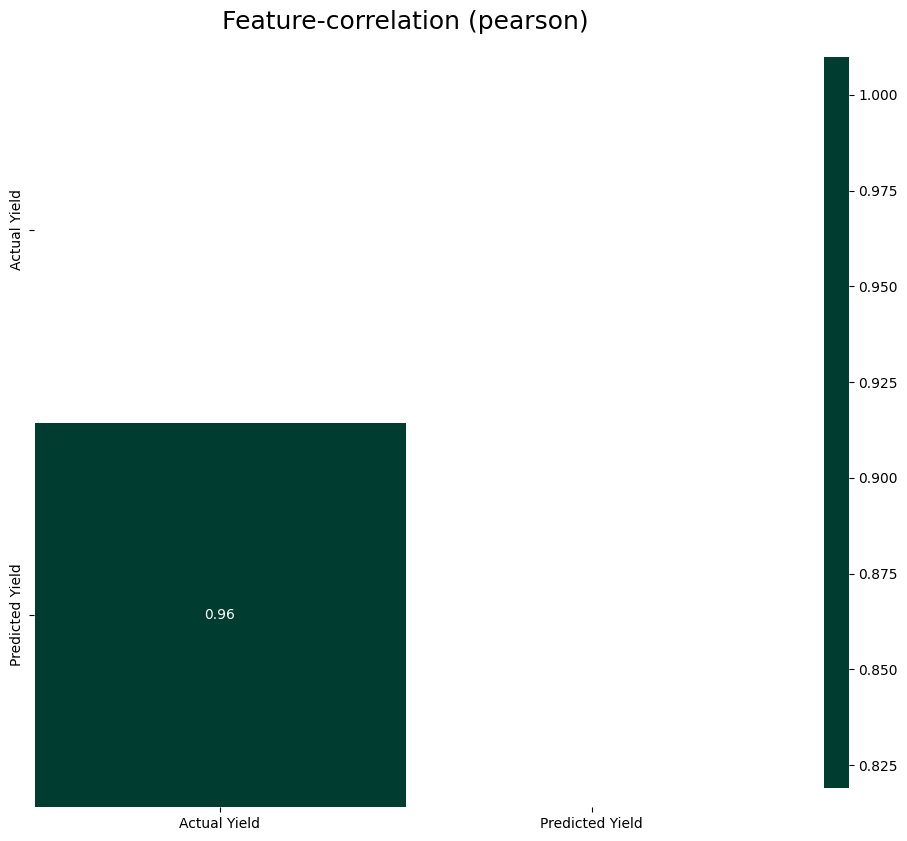

In [26]:
klib.corr_plot(df)

<Axes: >

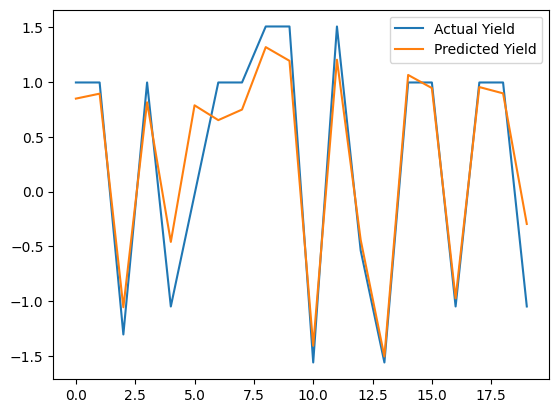

In [27]:
df.plot()

**PERFORMANCE METRICS**

In [28]:
mean_squared_error(y_test,y_pred)

0.10848498643857012

In [29]:
mean_absolute_error(y_test,y_pred)

0.24356343385254728

In [30]:
model.score(x_test,y_test)

-0.10848498643857012

In [31]:
r2_score(y_test,y_pred)

0.9113529319916615